$\textbf{Поиск стационарных структур в задаче Релея}$

$\text{задача Релея:} \\$
$\ddot x - \mu (1- \dot x^2)\dot x + x = 0$

$\text{С начальными условиями: } \\
$
$x(0) = 0 \\
\dot x(0) = 0.001\\
$
$\text{Переходим к системе уравнений} \\
$
$
\begin{cases}
   \dot x = y\\
   \dot y = \mu (1- y^2)y - x 
\end{cases}
$



In [107]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as sci
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import math
from mpmath import *
from sympy import *
%matplotlib inline

$\text{Методы рунге-Кутты 2, 3 порядков:}$

In [108]:
#определим матрицы для методов Рунге-Кутты
A1 = np.array([[(2 + 2**0.5)/2, 0],
               [- 1 - 2**0.5, (2 + 2**0.5)/2]])

b1 = np.array([1/2, 1/2])

A2 = np.array([[(2 - 2**0.5)/2, 0],
               [- 1 + 2**0.5, (2 - 2**0.5)/2]])
b2 = np.array([1/2, 1/2])

A3 = np.array([[(3 + 3**0.5)/6, 0], [- 3**0.5/3, (3 + 3**0.5)/6]])
b3 = np.array([1/2, 1/2])

#определим производную х
def dot_x1(x, mu):

    x1 = x[0]
    x2 = x[1]
    
    return np.array([x2, mu*x2*(1-x2**2) - x1])

In [109]:
def RK(t0, te, tau, Cauchy, mu, dot_x1, A, b):

    a11 = A[0][0]
    a21 = A[1][0]
    a22 = A[1][1]
    b1 = b[0]
    b2 = b[1]

    time = [t0]
    solution = [np.array(Cauchy)]
    
    while time[-1] < te:
        k1 = sci.root((lambda k: dot_x1(solution[-1] + tau * a11 * k, mu) - k), solution[-1]).x
        k2 = sci.root((lambda k: dot_x1(solution[-1] + tau * (a21 * k1 + a22 * k), mu) - k), solution[-1]).x
        time.append(time[-1] + tau)
        solution.append(solution[-1] + tau * (b1 * k1 + b2 * k2))
        
    return time, solution

In [134]:
#получение численного решения
t_rk1_mu1, sol_rk1_mu1 = RK(0, 1000, 0.01, [0, 0.001], 1, dot_x1, A1, b1)

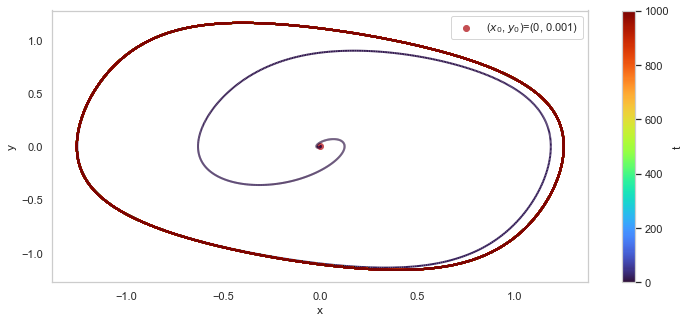

In [135]:
#Построение градиентного графика (цветом показана эволюция по времени)

fig, ax = plt.subplots(figsize = (12, 5))   
t, y = np.array(t_rk1_mu1), np.array(sol_rk1_mu1)
points = y.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
norm = plt.Normalize(min(t), max(t))
lc = LineCollection(segments, cmap='turbo', norm=norm)   
line = ax.add_collection(lc)
lc.set_array(t)
lc.set_linewidth(2)
if fig:
    fig.colorbar(line, ax = ax, label = "t")
ax.scatter([0], [0.001], color = "r", label = "($x_0$, $y_0$)=(0, 0.001)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
ax.grid()

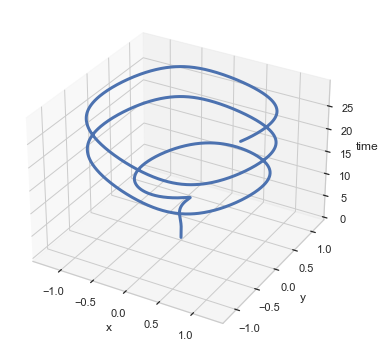

In [151]:
import seaborn as sb
import matplotlib.pyplot as plot
import numpy as np

sb.set_style("whitegrid")

OMEGA = 3

Z1 = np.array(t_rk1_mu1[:3000])
X1 = np.array(sol_rk1_mu1)[:3000,0]
Y1= np.array(sol_rk1_mu1)[:3000,1]

plot.figure(figsize=(6,5))
axes = plot.axes(projection='3d')
axes.plot3D(X1,Y1,Z1, lw=3)

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('time')

# keeps padding between figure elements
plot.tight_layout()
plot.show()

$\text{При параметре $\mu = 1$ фазовая траектрория выходит на предельный цикл за дочтаточно короткое время(порядка 10 единиц)}, \\ \text{При этом $\mu = 1$ здесь - параметр жесткости, если уменьшить его в 10 раз, траектроия будет выходить на предельный цикл дольше:}$

In [152]:
t_rk1, sol_rk1 = RK(0, 1000, 0.01, [0, 0.001], 0.1, dot_x1, A1, b1)

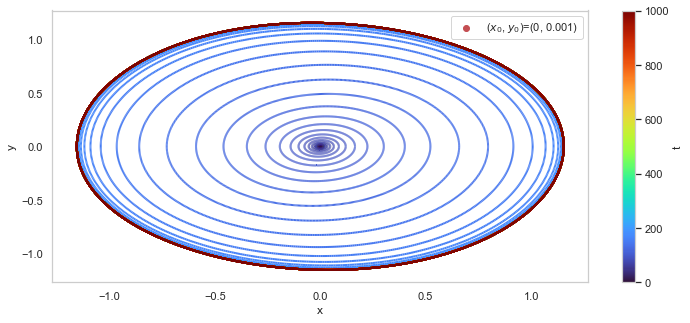

In [154]:
fig, ax = plt.subplots(figsize = (12, 5))   
t, y = np.array(t_rk1), np.array(sol_rk1)
points = y.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
norm = plt.Normalize(min(t), max(t))
lc = LineCollection(segments, cmap='turbo', norm=norm)   
line = ax.add_collection(lc)
lc.set_array(t)
lc.set_linewidth(2)
if fig:
    fig.colorbar(line, ax = ax, label = "t")
ax.scatter([0], [0.001], color = "r", label = "($x_0$, $y_0$)=(0, 0.001)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
ax.grid()

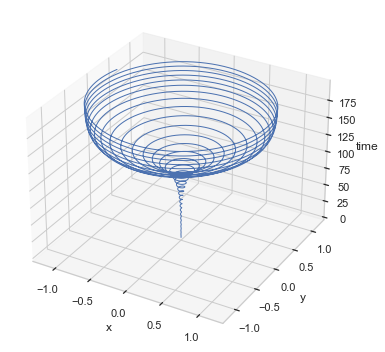

In [158]:
import seaborn as sb
import matplotlib.pyplot as plot
import numpy as np

sb.set_style("whitegrid")

OMEGA = 3

Z1 = np.array(t_rk1[:20000])
X1 = np.array(sol_rk1)[:20000,0]
Y1= np.array(sol_rk1)[:20000,1]

plot.figure(figsize=(6,5))
axes = plot.axes(projection='3d')
axes.plot3D(X1,Y1,Z1, lw=1)

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('time')

# keeps padding between figure elements
plot.tight_layout()
plot.show()

$\text{Таким образом можно сказать, что физический смысл параметра $\frac{1}{\mu}$ - скорость перехода в стационарное состояние}$